
**__PRICE DETECTOR__**
                                            

Get data from csv and store on a dataset

In [1]:
import pandas as pd
df = pd.read_csv('housing.csv')
df.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


We divide the dataset into training dataset (80%) and test dataset (20%).

In [2]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2, random_state= 22)

train.to_csv("housing_train.csv", index = False)
test.to_csv("housing_test.csv", index = False)

_______________________________________________________________________________________EDA______________________________________________________________________________________________________

EDA. central point of each feature: mean, median e mode

In [3]:
df_EDA_num = df.drop(['ocean_proximity'], axis=1)
mean = df_EDA_num.mean()
median = df_EDA_num.median()
mode = df_EDA_num.mode().iloc[0]

print("Mean: ")
print(mean)

print("\nMedian: ")
print(median)

print("\nMode: ")
print(mode)

Mean: 
longitude               -119.569704
latitude                  35.631861
housing_median_age        28.639486
total_rooms             2635.763081
total_bedrooms           537.870553
population              1425.476744
households               499.539680
median_income              3.870671
median_house_value    206855.816909
dtype: float64

Median: 
longitude               -118.4900
latitude                  34.2600
housing_median_age        29.0000
total_rooms             2127.0000
total_bedrooms           435.0000
population              1166.0000
households               409.0000
median_income              3.5348
median_house_value    179700.0000
dtype: float64

Mode: 
longitude               -118.310
latitude                  34.060
housing_median_age        52.000
total_rooms             1527.000
total_bedrooms           280.000
population               891.000
households               306.000
median_income              3.125
median_house_value    500001.000
Name: 0, dtype: fl

EDA. spread of each feature: standard deviation and range

In [4]:
std_deviation = df_EDA_num.std()
range = df_EDA_num.max() - df_EDA_num.min()

print("Standard deviation:")
print(std_deviation)
print("\nRange: ")
print(range)



Standard deviation:
longitude                  2.003532
latitude                   2.135952
housing_median_age        12.585558
total_rooms             2181.615252
total_bedrooms           421.385070
population              1132.462122
households               382.329753
median_income              1.899822
median_house_value    115395.615874
dtype: float64

Range: 
longitude                 10.0400
latitude                   9.4100
housing_median_age        51.0000
total_rooms            39318.0000
total_bedrooms          6444.0000
population             35679.0000
households              6081.0000
median_income             14.5002
median_house_value    485002.0000
dtype: float64


EDA: visualisation of the characteristics of each feature: histograms and distribution plots

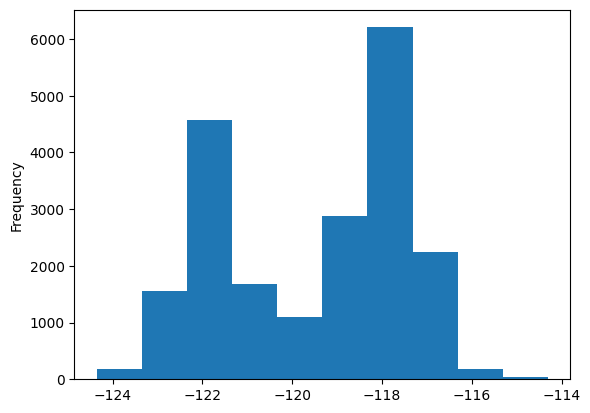

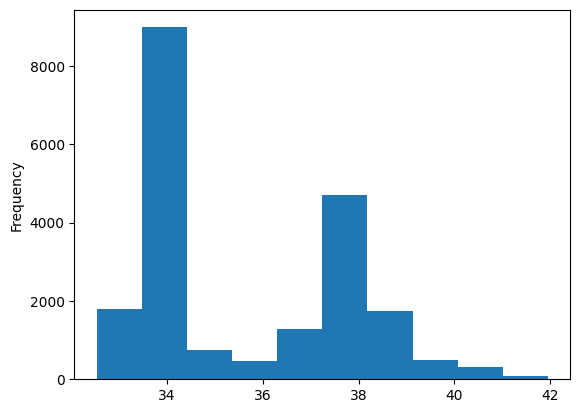

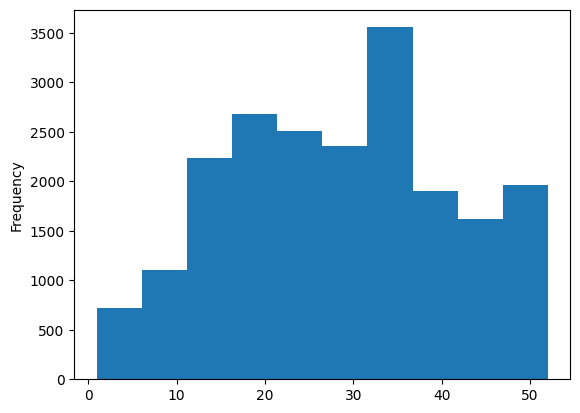

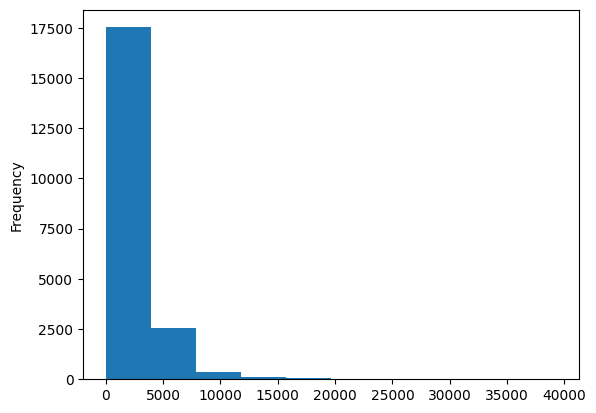

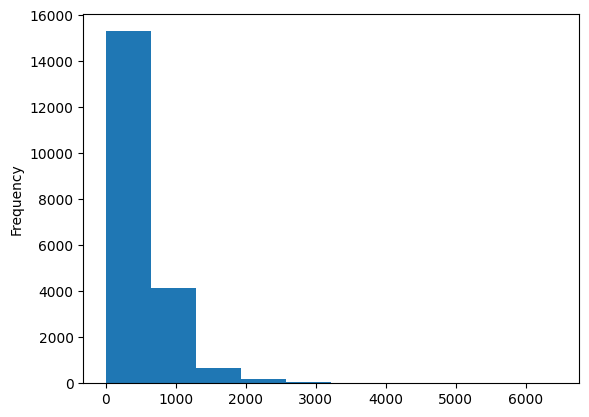

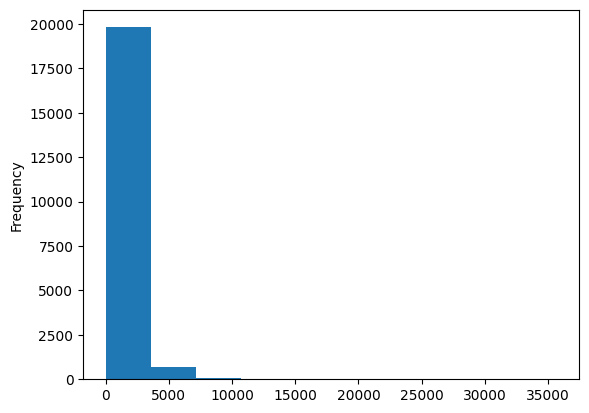

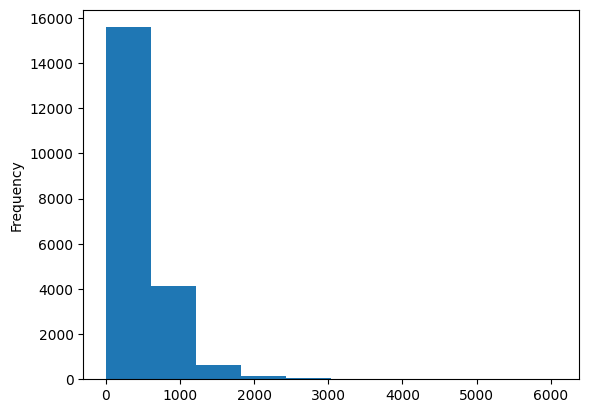

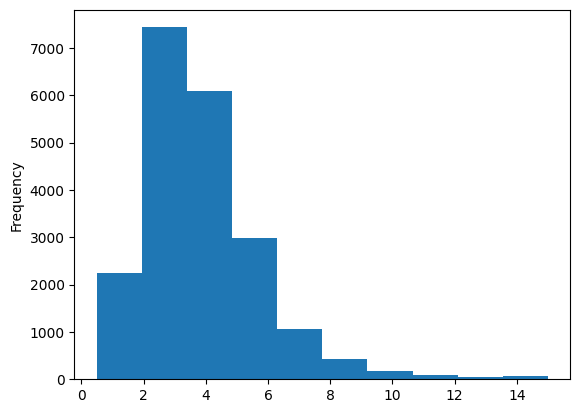

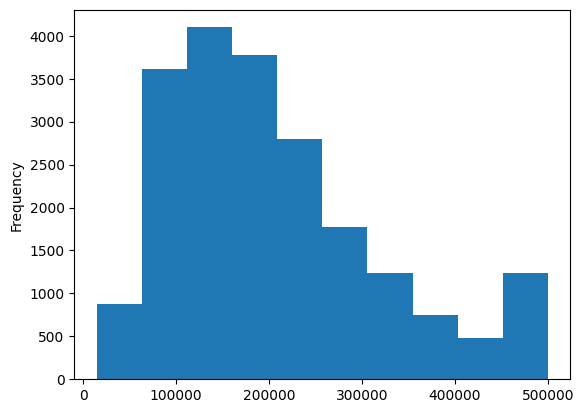

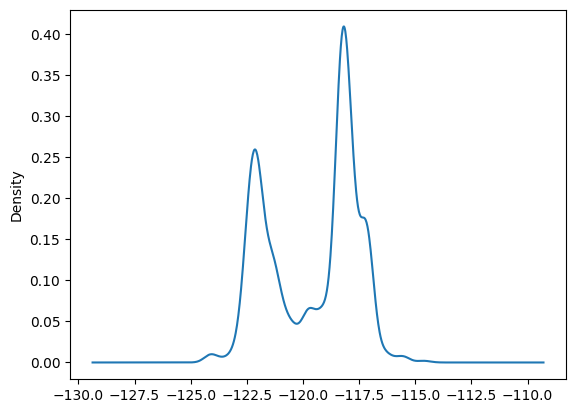

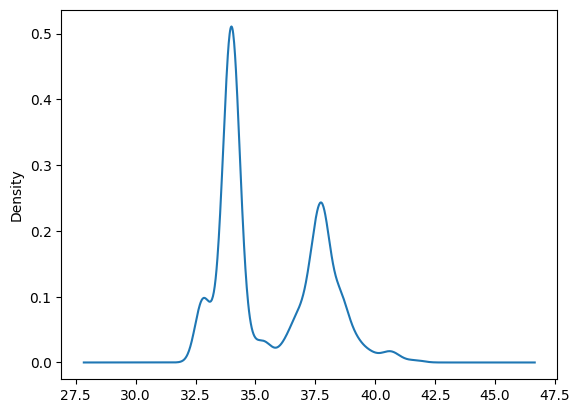

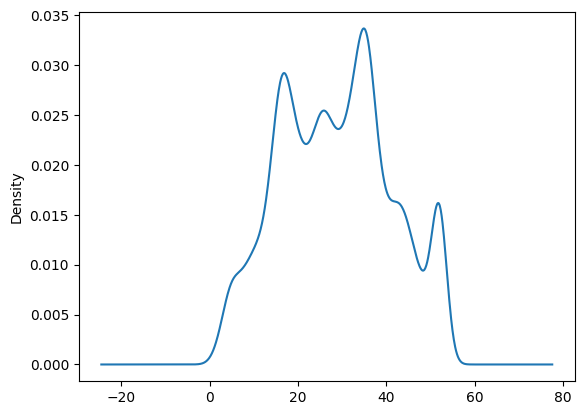

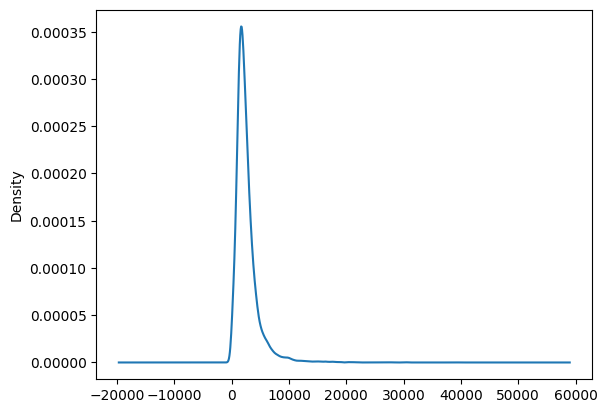

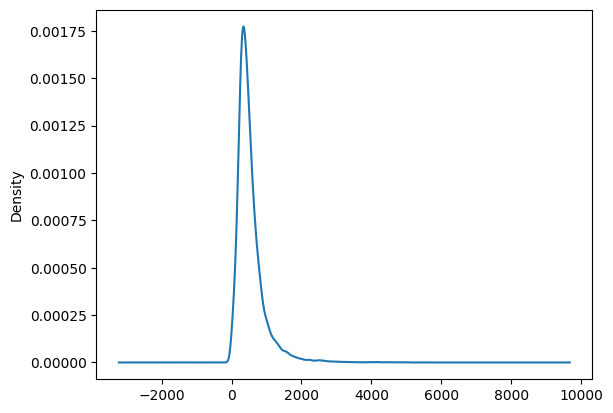

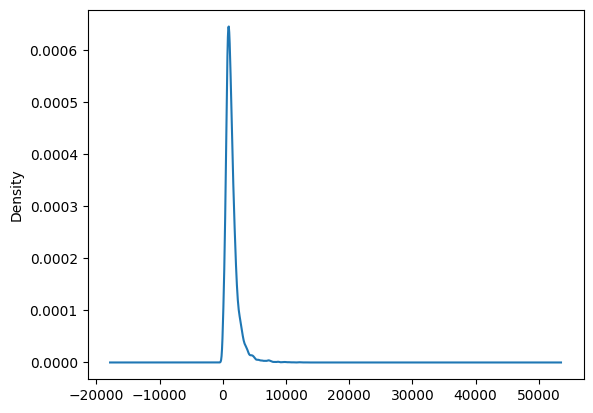

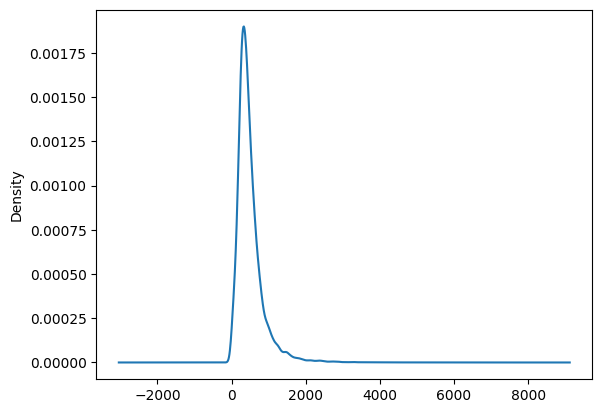

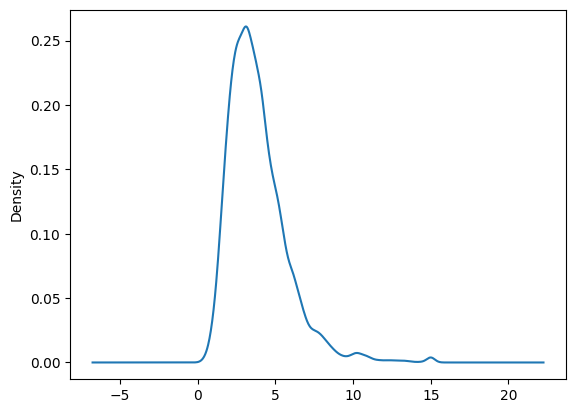

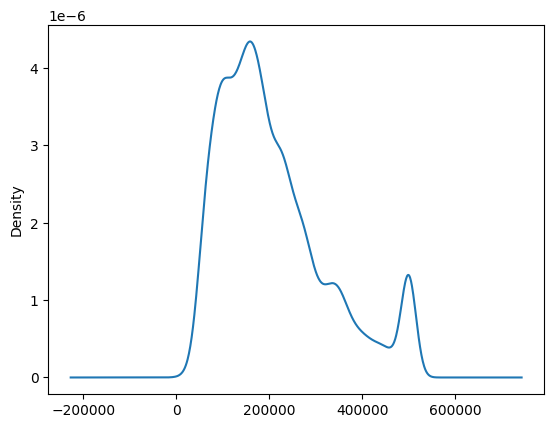

In [5]:
import matplotlib.pyplot as plt

#Histograms
(df['longitude'].astype(float)).plot(kind='hist')
plt.show()
(df['latitude'].astype(float)).plot(kind='hist')
plt.show()
(df['housing_median_age'].astype(float)).plot(kind='hist')
plt.show()
(df['total_rooms'].astype(float)).plot(kind='hist')
plt.show()
(df['total_bedrooms'].astype(float)).plot(kind='hist')
plt.show()
(df['population'].astype(float)).plot(kind='hist')
plt.show()
(df['households'].astype(float)).plot(kind='hist')
plt.show()
(df['median_income'].astype(float)).plot(kind='hist')
plt.show()
(df['median_house_value'].astype(float)).plot(kind='hist')
plt.show()

#Distribution Plots
(df['longitude'].astype(float)).plot(kind='density')
plt.show()
(df['latitude'].astype(float)).plot(kind='density')
plt.show()
(df['housing_median_age'].astype(float)).plot(kind='density')
plt.show()
(df['total_rooms'].astype(float)).plot(kind='density')
plt.show()
(df['total_bedrooms'].astype(float)).plot(kind='density')
plt.show()
(df['population'].astype(float)).plot(kind='density')
plt.show()
(df['households'].astype(float)).plot(kind='density')
plt.show()
(df['median_income'].astype(float)).plot(kind='density')
plt.show()
(df['median_house_value'].astype(float)).plot(kind='density')
plt.show()

EDA. pivot table and heat map

EDA. outlier analysis: scatter plot and/or box plot

_______________________________________________________________________________________EDA______________________________________________________________________________________________________

We divide the information into what is data and what is the target

In [6]:
df_train = pd.read_csv("housing_train.csv")
data, target = df_train.drop(['median_house_value'], axis=1), df_train['median_house_value'].copy()
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-119.72,36.76,23.0,6403.0,NaN,3573.0,1260.0,2.3006,INLAND
1,-120.79,38.70,13.0,5036.0,1034.0,2243.0,923.0,2.3319,INLAND
2,-118.20,34.04,18.0,796.0,227.0,547.0,218.0,1.0333,<1H OCEAN
3,-117.34,33.21,12.0,5963.0,1372.0,3015.0,1124.0,2.7386,NEAR OCEAN
4,-121.46,38.54,48.0,1001.0,205.0,605.0,175.0,1.8333,INLAND


Process data in order to eliminate missing values, transfor non categoric data and then normalize

Numerical data

In [7]:
data_num = data.drop(['ocean_proximity'], axis = 1)
data_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.72,36.76,23.0,6403.0,NaN,3573.0,1260.0,2.3006
1,-120.79,38.70,13.0,5036.0,1034.0,2243.0,923.0,2.3319
2,-118.20,34.04,18.0,796.0,227.0,547.0,218.0,1.0333
3,-117.34,33.21,12.0,5963.0,1372.0,3015.0,1124.0,2.7386
4,-121.46,38.54,48.0,1001.0,205.0,605.0,175.0,1.8333


Categorical data

In [8]:
data_no_num = data[['ocean_proximity']]
data_no_num.head()

,ocean_proximity
0,INLAND
1,INLAND
2,<1H OCEAN
3,NEAR OCEAN
4,INLAND


Check missing values in numeric dataset

In [9]:
data_num.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        163
population              0
households              0
median_income           0
dtype: int64

Check missing values in categorical dataset

In [10]:
data_no_num.isnull().sum()

ocean_proximity    0
dtype: int64

Fill in the numerical dataset using the median in the missing values.

In [11]:
# Importar la clase SimpleImputer desde sklearn.impute
from sklearn.impute import SimpleImputer
# Crear una instancia del imputador con la estrategia de imputación "median" (mediana)
imputer = SimpleImputer(strategy="median")
# Ajustar el imputador a los datos numéricos
imputer.fit(data_num)
# Obtener las estadísticas calculadas por el imputador (en este caso, la mediana de cada columna)
imputer.statistics_
# Rellenar el conjunto de datos utilizando el imputador
X = imputer.transform(data_num)
# Crear un nuevo DataFrame con los datos imputados
data_num_filled = pd.DataFrame(X, columns=data_num.columns, index=data.index)
# Comprobar si hay valores nulos después de la imputación
data_num_filled.isnull().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

We normalise the numerical values  


![Alt text](image.png)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_num_scaled = scaler.fit_transform(data_num)
data_tr = pd.DataFrame(data_num_scaled, columns=data_num.columns, index=data.index)
data_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.634900e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,7.217525e-16,6.491362e-16,1.207583e-16,2.216143e-17,-2.933613e-18,7.627404e-17,4.028862e-17,-6.981926e-17
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000031e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-2.381604e+00,-1.445235e+00,-2.201136e+00,-1.214416e+00,-1.278351e+00,-1.256377e+00,-1.310671e+00,-1.764526e+00
25%,-1.105456e+00,-7.998537e-01,-8.491991e-01,-5.457575e-01,-5.776820e-01,-5.636872e-01,-5.758077e-01,-6.848289e-01
50%,5.324548e-01,-6.455233e-01,2.558386e-02,-2.329159e-01,-2.440301e-01,-2.270859e-01,-2.333984e-01,-1.765975e-01
75%,7.819462e-01,9.679302e-01,6.617896e-01,2.338048e-01,2.564478e-01,2.609859e-01,2.723138e-01,4.571083e-01
max,2.628182e+00,2.950841e+00,1.854675e+00,1.631534e+01,1.407917e+01,3.034782e+01,1.470618e+01,5.825810e+00


We transform non-categorical data into categorical data.

In [13]:
#los sistemas de ML solo son capaces de trabajar con datos 
#numericos asi q tranformamos los no numericos en numericos 
#mediante el uso de OneHotEncoder

from sklearn.preprocessing import OneHotEncoder
no_num_encoder = OneHotEncoder()
data_no_num_encoded = no_num_encoder.fit_transform(data_no_num)
data_no_num_encoded_df=pd.DataFrame(data_no_num_encoded.toarray()) 
print(data_no_num_encoded_df)

         0    1    2    3    4
0      0.0  1.0  0.0  0.0  0.0
1      0.0  1.0  0.0  0.0  0.0
2      1.0  0.0  0.0  0.0  0.0
3      0.0  0.0  0.0  0.0  1.0
4      0.0  1.0  0.0  0.0  0.0
...    ...  ...  ...  ...  ...
16507  0.0  1.0  0.0  0.0  0.0
16508  1.0  0.0  0.0  0.0  0.0
16509  0.0  0.0  0.0  1.0  0.0
16510  0.0  0.0  0.0  0.0  1.0
16511  1.0  0.0  0.0  0.0  0.0

[16512 rows x 5 columns]


So far we have already dealt with all the information but we can systematise this process by using PIPELINES.

PIPELINES

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Lista de columnas numéricas
num_attributes = list(data_num.columns)
print(num_attributes)

# Lista de columnas categóricas
cat_attributes = ["ocean_proximity"]
print(cat_attributes)

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler()),    
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder()),  # No es necesario especificar las categorías aquí
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attributes),
    ("cat", cat_pipeline, cat_attributes)
])

data_processed = full_pipeline.fit_transform(data)
print(data["ocean_proximity"].nunique())
print(type(data["ocean_proximity"].unique()))
print(data_processed.shape)


['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
['ocean_proximity']
5
<class 'numpy.ndarray'>
(16512, 13)


Models Analysis

After analyzing all the models we create a function in order to display the mean and the variation to analyze the acurracy of the model (the lower this values are, the better)

In [15]:
def display_score(sc):
    print("Score:", sc)
    print("Mean:", sc.mean())
    print("Std deviation:", sc.std())

Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

#Aqui entrenamamos el modelo.
linear_regression.fit(data_processed, target)

from sklearn.model_selection import cross_val_score
import numpy as np

#El modelo LR ya ha sido entrenado entonces validamos el ese modelo con la data_processed y el target
scores = cross_val_score(linear_regression, data_processed, target, scoring="neg_mean_squared_error", cv=10)
score_processed_LR = np.sqrt(-scores)
display_score(score_processed_LR)

Score: [63881.40814274 67801.24474748 68892.02769623 73245.51486074
 72158.31489062 68073.29764778 69378.90586359 70696.31491811
 70987.82888895 67167.47146292]
Mean: 69228.23291191524
Std deviation: 2575.2001334016063


Decision Tree

In [17]:
from sklearn.tree import DecisionTreeRegressor

tree_regression = DecisionTreeRegressor(random_state=42)

#Aqui entrenamamos el modelo.
tree_regression.fit(data_processed, target)

#El modelo TR ya ha sido entrenado entonces validamos el ese modelo con la data_processed y el target
scores = cross_val_score(tree_regression, data_processed, target, scoring="neg_mean_squared_error", cv=10)
score_processed_TR = np.sqrt(-scores)
display_score(score_processed_TR)

Score: [66724.69816394 67587.81730891 69931.61455158 67423.1976853
 69321.77404271 69144.15997257 68938.36398462 69689.73903145
 71542.74876826 70285.41114822]
Mean: 69058.95246575619
Std deviation: 1386.0890432795886


Random Forest (Set of Decisions Trees)

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf_regression = RandomForestRegressor(random_state=42)

#Aqui entrenamamos el modelo.
rf_regression.fit(data_processed, target)

#El modelo LR ya ha sido entrenado entonces validamos el ese modelo con la data_processed y el target
scores = cross_val_score(rf_regression, data_processed, target, scoring="neg_mean_squared_error", cv=10)
score_processed_RF = np.sqrt(-scores)
display_score(score_processed_RF)

Score: [43352.06931267 48126.36117923 50160.87672358 49244.60911433
 49597.7136131  50756.66786053 51089.76080432 52310.79109074
 50891.51946603 46605.78724241]
Mean: 49213.61564069473
Std deviation: 2483.8518439097506


Graph to visually compare the results

In [19]:
import matplotlib.pyplot as plt
import numpy as np

list_model = ['LinearRegression', 'Decision Tree', 'Random Forest']
list_mean = [69228.23291191524, 69058.95246575619, 49213.61564069473]
list_sd = [2575.2001334016063, 1386.0890432795886, 2483.8518439097506]

plt.figure(figsize=(8, 5))  # Increased the figure size for better visualization

x_values = np.arange(len(list_model))

for i in range(len(list_model)):
    plt.errorbar(x_values[i], list_mean[i], yerr=list_sd[i], fmt='o', label=list_model[i], linewidth=3)

plt.xticks(x_values, list_model)
plt.title("Models Evaluation")
plt.ylim(40000, 80000)  # Adjusted y-axis limits
plt.grid(True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(True, which='major', color='#999999', linestyle='-', alpha=0.2)
plt.legend()  # Added legend for model labels
plt.show()


TypeError: 'Series' object is not callable

<Figure size 800x500 with 0 Axes>

After this evaluation we can afirm that the best model to use is Random Forest, now we can adjust its parameters in order to get an even better result

In [ ]:
# Get the hyperparameters of the trained Random Forest model
from sklearn.ensemble import RandomForestRegressor
rf_regression = RandomForestRegressor(random_state=42)
hyperparameters = rf_regression.get_params()

# Print the hyperparameters
print("Random Forest Hyperparameters:")
for param, value in hyperparameters.items():
    print(f"{param}: {value}")

Random Forest Hyperparameters:
bootstrap: True
ccp_alpha: 0.0
criterion: squared_error
max_depth: None
max_features: 1.0
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


After this visualization of the parameters we can see that the ones interesting to evaluate are: max_features, n_estimators.
    -n_estimators: number of trees in the random forest.
    -max_features: number of features each tree can have

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [2, 5, 10, 20, 30, 40, 50], 'max_features': [2, 4, 6, 8, 10, 12, 14]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, n_jobs=-1)
grid_search.fit(data_processed, target)

grid_search.best_params_

{'max_features': 6, 'n_estimators': 50}

Once we already have all the best parameters, we proceed to test the outcomes of the model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_regression = RandomForestRegressor(random_state=42, n_estimators=50, max_features=6)

#Aqui entrenamamos el modelo.
rf_regression.fit(data_processed, target)

#El modelo LR ya ha sido entrenado entonces validamos el ese modelo con la data_processed y el target
scores = cross_val_score(rf_regression, data_processed, target, scoring="neg_mean_squared_error", cv=10)
score_processed_RF = np.sqrt(-scores)
display_score(score_processed_RF)

Score: [43192.66741885 48166.07363676 49695.59542259 49378.15848235
 49966.06351042 49335.19488981 49671.80023779 51230.96708142
 51265.84807253 46059.03261131]
Mean: 48796.14013638545
Std deviation: 2342.8472836394603


Display of all the results

In [ ]:
list_model = ['LinearRegression', 'Decision Tree', 'Random Forest', 'Random Forest Parametized']
list_mean = [69228.23291191524, 69058.95246575619, 49213.61564069473, 48796.14013638545]
list_sd = [2575.2001334016063, 1386.0890432795886, 2483.8518439097506, 2342.8472836394603]

plt.figure(figsize=(10, 5))  # Increased the figure size for better visualization

x_values = np.arange(len(list_model))

for i in range(len(list_model)):
    plt.errorbar(x_values[i], list_mean[i], yerr=list_sd[i], fmt='o', label=list_model[i], linewidth=3)

plt.xticks(x_values, list_model)
plt.title("Models Evaluation")
plt.ylim(45000, 80000)
plt.grid(True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(True, which='major', color='#999999', linestyle='-', alpha=0.2)
plt.legend()  # Added legend for model labels
plt.show()


TypeError: 'Series' object is not callable

<Figure size 1000x500 with 0 Axes>

Once we have the model that gives us the best result, is moment to test it.

In [ ]:
from sklearn.metrics import mean_squared_error

test_data = pd.read_csv('housing_test.csv')

final_model = grid_search.best_estimator_

data_test = test_data.drop("median_house_value", axis=1)
target_test = test_data["median_house_value"].copy()

data_test_prepared = full_pipeline.transform(data_test)
final_predictions = final_model.predict(data_test_prepared)

final_mse = mean_squared_error(target_test, final_predictions)
final_rmse = np.sqrt(final_mse)

min_price = target_test.min()
max_price = target_test.max()

print("Menor Precio:", min_price)
print("Mayor Precio:", max_price)
print("Root Mean Squared Error:" ,final_rmse  )

Menor Precio: 14999.0
Mayor Precio: 500001.0
Root Mean Squared Error: 48050.16049806906


The price of the houses oscilate between 15000 and 500000 and our RMSE is of aroung 48050, so we can conclude that this model has a error of the 9,6%

In [ ]:
# # Prueba todos los modelos

# from sklearn.utils import all_estimators
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import mean_squared_error
# import numpy as np

# # Obtener todos los modelos de regresión disponibles en Scikit-Learn
# regression_models = [name for name, _ in all_estimators(type_filter='regressor')]

# for model_name in regression_models:
#     try:
#         # Modificar la forma de instanciar el modelo sin incluir aliases
#         model_class = all_estimators(type_filter='regressor')[model_name]
#         model = model_class()

#         # Evaluación con validación cruzada (reemplazar con tus propios datos)
#         scores = cross_val_score(model, data_processed, target, scoring='neg_mean_squared_error', cv=5)

#         # Calcular la raíz del error cuadrático medio (RMSE) promedio
#         rmse = np.sqrt(-scores)

#         # Imprimir los resultados para cada modelo
#         print(f"Model: {model_name}")
#         print(f"Mean RMSE: {rmse.mean()}")
#         print(f"Std RMSE: {rmse.std()}")
#         print("--------------")
#     except Exception as e:
#         print(f"Error with {model_name}: {e}")
